Imports

In [664]:
#import libaries
import pandas as pd

In [665]:
#load the dataset
sales = pd.read_excel(r"C:\Users\bashi\Documents\Task\2.-Badly-Structured-Sales-Data-2.xlsx")

Inspect the dataset

In [666]:
sales.head()

,Ship Mode,First Class,Unnamed: 2,Unnamed: 3,Same Day,Unnamed: 5,Unnamed: 6,Second Class,Unnamed: 8,Unnamed: 9,Standard Class,Unnamed: 11,Unnamed: 12
0,Segment,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office
1,Order Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-03-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056
3,2013-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,129.44,NaN,NaN,NaN,NaN,NaN
4,2013-06-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.47,NaN,NaN


In [667]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Ship Mode       824 non-null    object
 1   First Class     73 non-null     object
 2   Unnamed: 2      41 non-null     object
 3   Unnamed: 3      13 non-null     object
 4   Same Day        29 non-null     object
 5   Unnamed: 5      6 non-null      object
 6   Unnamed: 6      7 non-null      object
 7   Second Class    92 non-null     object
 8   Unnamed: 8      51 non-null     object
 9   Unnamed: 9      24 non-null     object
 10  Standard Class  254 non-null    object
 11  Unnamed: 11     153 non-null    object
 12  Unnamed: 12     91 non-null     object
dtypes: object(13)
memory usage: 83.8+ KB


Rename columns

In [668]:
sales = sales.rename(columns={'Ship Mode': 'Ship Date', 'First Class': 'FC_Consumer', 'Unnamed: 2': 'FC_Corporate', 'Unnamed: 3': 'FC_Home Office', 'Same Day': 'SD_Consumer', 'Unnamed: 5': 'SD_Corporate', 'Unnamed: 6': 'SD_Home Office', 'Second Class': 'SC_Consumer', 'Unnamed: 8': 'SC_Corporate', 'Unnamed: 9': 'SC_Home Office', 'Standard Class': 'STC_Consumer', 'Unnamed: 11': 'STC_Corporate', 'Unnamed: 12': 'STC_Home Office'})

In [669]:
#to confirm the columns have been renamed
sales.head()

,Ship Date,FC_Consumer,FC_Corporate,FC_Home Office,SD_Consumer,SD_Corporate,SD_Home Office,SC_Consumer,SC_Corporate,SC_Home Office,STC_Consumer,STC_Corporate,STC_Home Office
0,Segment,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office
1,Order Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-03-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056
3,2013-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,129.44,NaN,NaN,NaN,NaN,NaN
4,2013-06-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.47,NaN,NaN


In [670]:
#remove first 2 rows
sales = sales.drop(sales.index[0:2])

In [671]:
#Change dates to datetime
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])

In [672]:
#set date as index
sales.set_index('Ship Date', inplace=True)

In [673]:
#To confirm
sales.head()

,FC_Consumer,FC_Corporate,FC_Home Office,SD_Consumer,SD_Corporate,SD_Home Office,SC_Consumer,SC_Corporate,SC_Home Office,STC_Consumer,STC_Corporate,STC_Home Office
Ship Date,,,,,,,,,,,,
2013-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056
2013-12-16,NaN,NaN,NaN,NaN,NaN,NaN,129.44,NaN,NaN,NaN,NaN,NaN
2013-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.47,NaN,NaN
2013-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788.86,NaN
2013-08-27,NaN,NaN,NaN,NaN,NaN,NaN,13.36,NaN,NaN,NaN,NaN,NaN


In [674]:
#Fill missing values with 0 (for days without orders)
#sales.fillna(0, inplace=True)

In [675]:
#Rearrange dates chronologically
sales.sort_index(inplace=True)

Descriptive Statistics

In [676]:
#mean
mean_sales = sales.iloc[:, :].mean()
mean_sales


FC_Consumer        288.919069
FC_Corporate       519.815175
FC_Home Office       644.8155
SD_Consumer        290.443179
SD_Corporate        1981.4616
SD_Home Office     496.242667
SC_Consumer        546.420379
SC_Corporate        704.86462
SC_Home Office     382.222913
STC_Consumer       462.142824
STC_Corporate      368.044648
STC_Home Office    608.318139
dtype: object

In [677]:
#median
median_sales = sales.iloc[:, :].median()
median_sales

FC_Consumer          84.03
FC_Corporate       238.373
FC_Home Office     212.518
SD_Consumer         98.575
SD_Corporate       630.024
SD_Home Office     257.629
SC_Consumer         173.94
SC_Corporate        305.82
SC_Home Office      91.475
STC_Consumer        181.86
STC_Corporate      105.828
STC_Home Office     127.53
dtype: object

In [678]:
#quartile
first_quartile = sales.iloc[:, :].quantile(.25)
first_quartile

FC_Consumer        33.89625
FC_Corporate          43.34
FC_Home Office      118.827
SD_Consumer          34.394
SD_Corporate         158.71
SD_Home Office      152.207
SC_Consumer          31.947
SC_Corporate         25.725
SC_Home Office       62.356
STC_Consumer          41.86
STC_Corporate       30.2445
STC_Home Office      32.501
Name: 0.25, dtype: object

In [679]:
second_quartile = sales.iloc[:, :].quantile(.5)
second_quartile

FC_Consumer          84.03
FC_Corporate       238.373
FC_Home Office     212.518
SD_Consumer         98.575
SD_Corporate       630.024
SD_Home Office     257.629
SC_Consumer         173.94
SC_Corporate        305.82
SC_Home Office      91.475
STC_Consumer        181.86
STC_Corporate      105.828
STC_Home Office     127.53
Name: 0.5, dtype: object

In [680]:
third_quartile = sales.iloc[:, :].quantile(.75)
third_quartile

FC_Consumer           326.36
FC_Corporate       668.90525
FC_Home Office       497.042
SD_Consumer        324.51975
SD_Corporate          839.25
SD_Home Office      260.6475
SC_Consumer        664.44525
SC_Corporate        1084.147
SC_Home Office       708.855
STC_Consumer          544.38
STC_Corporate       362.2645
STC_Home Office     467.7445
Name: 0.75, dtype: object

In [681]:
std_sales = sales.iloc[:, :].std()
std_sales

FC_Consumer         442.658249
FC_Corporate        770.910076
FC_Home Office      969.228902
SD_Consumer         375.776252
SD_Corporate       3471.843216
SD_Home Office      780.387486
SC_Consumer        1159.121189
SC_Corporate        969.253033
SC_Home Office      393.345841
STC_Consumer        756.219442
STC_Corporate       674.716676
STC_Home Office    2526.198906
dtype: object

In [682]:
max_sales = sales.iloc[:, :].max()
max_sales

FC_Consumer           2298.9
FC_Corporate         3236.41
FC_Home Office       2884.37
SD_Consumer          1363.96
SD_Corporate         8167.42
SD_Home Office       2075.51
SC_Consumer          8805.04
SC_Corporate         4251.92
SC_Home Office       1166.92
STC_Consumer         6412.77
STC_Corporate         4317.3
STC_Home Office    23661.228
dtype: object

In [683]:
min_sales = sales.iloc[:, :].min()
min_sales

FC_Consumer          2.214
FC_Corporate         2.896
FC_Home Office       3.744
SD_Consumer         10.272
SD_Corporate       111.904
SD_Home Office       7.968
SC_Consumer          2.064
SC_Corporate          3.76
SC_Home Office       3.444
STC_Consumer          2.61
STC_Corporate        1.167
STC_Home Office       3.76
dtype: object

In [684]:
#calculating the range
range_sales = max_sales - min_sales
range_sales

FC_Consumer         2296.686
FC_Corporate        3233.514
FC_Home Office      2880.626
SD_Consumer         1353.688
SD_Corporate        8055.516
SD_Home Office      2067.542
SC_Consumer         8802.976
SC_Corporate         4248.16
SC_Home Office      1163.476
STC_Consumer         6410.16
STC_Corporate       4316.133
STC_Home Office    23657.468
dtype: object

Visualizations


In [685]:
import matplotlib.pyplot as plt
import seaborn as sns

In [686]:
#create series for each shipment class

#First Class
first_class = sales.iloc[:, 0:3]

#Same Day
same_day = sales.iloc[:, 3:6]

#Second Class 
second_class = sales.iloc[:, 6:9]

#Standard Class
standard_class = sales.iloc[:, 9:12]


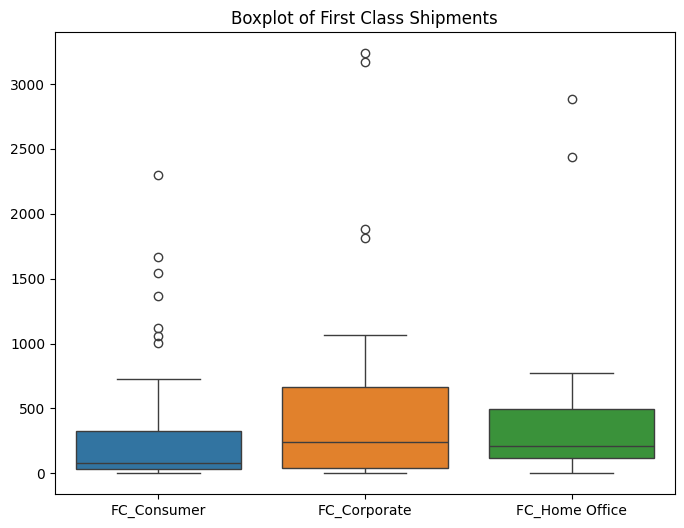

In [687]:
#Boxplot of First class
plt.figure(figsize=(8, 6))
sns.boxplot(data=first_class)
plt.title('Boxplot of First Class Shipments')
plt.savefig('Boxplot_Firstclass.png')
plt.show()

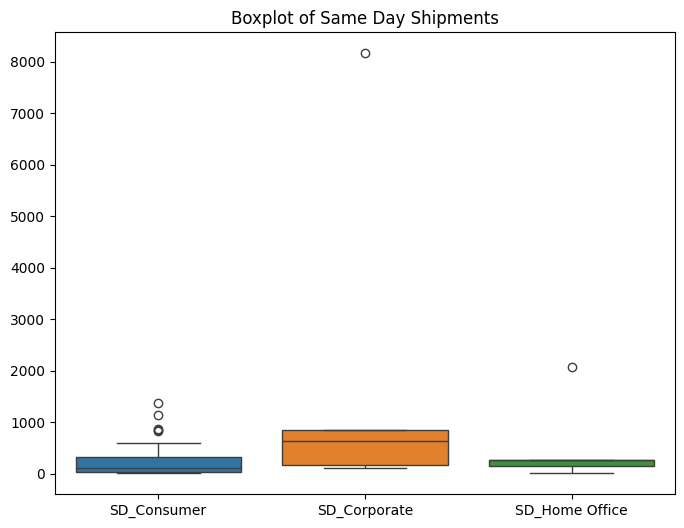

In [688]:
#Boxplot of Same day
plt.figure(figsize=(8, 6))
sns.boxplot(data= same_day)
plt.title('Boxplot of Same Day Shipments')
plt.savefig('Boxplot_Sameday.png')
plt.show()

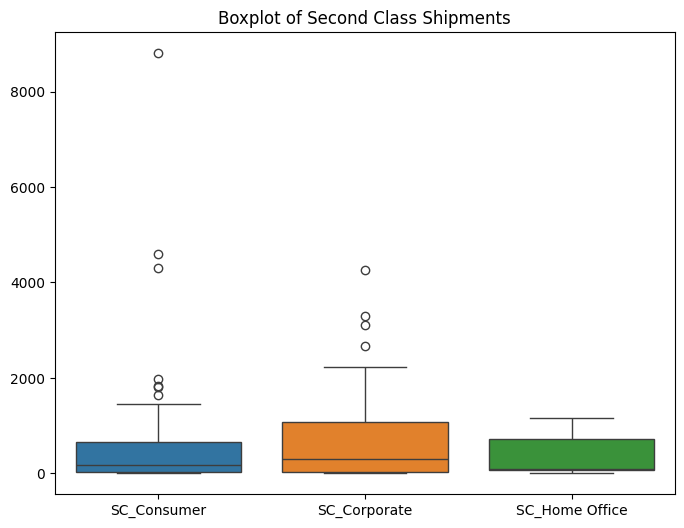

In [689]:
#Boxplot of Second Class
plt.figure(figsize=(8, 6))
sns.boxplot(data= second_class)
plt.title('Boxplot of Second Class Shipments')
plt.savefig('Boxplot_Secondclass.png')
plt.show()

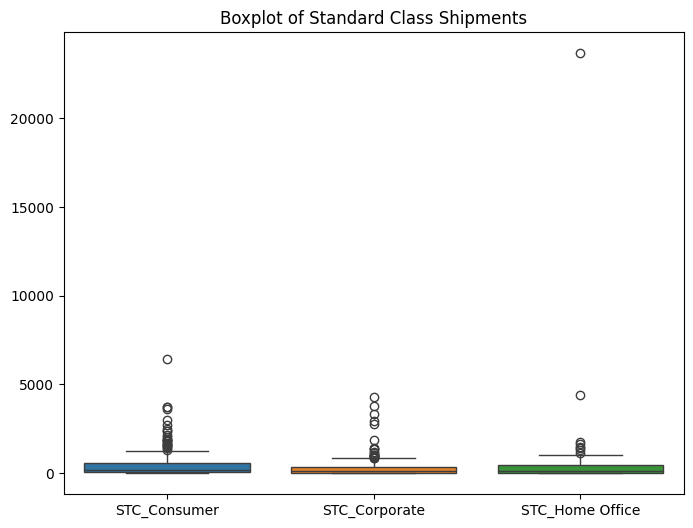

In [690]:
#Boxplot of Standard Class
plt.figure(figsize=(8, 6))
sns.boxplot(data= standard_class)
plt.title('Boxplot of Standard Class Shipments')
plt.savefig('Boxplot_Standardclass.png')
plt.show()

C:\Users\bashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\lib\_histograms_impl.py:841: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\lib\_histograms_impl.py:842: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


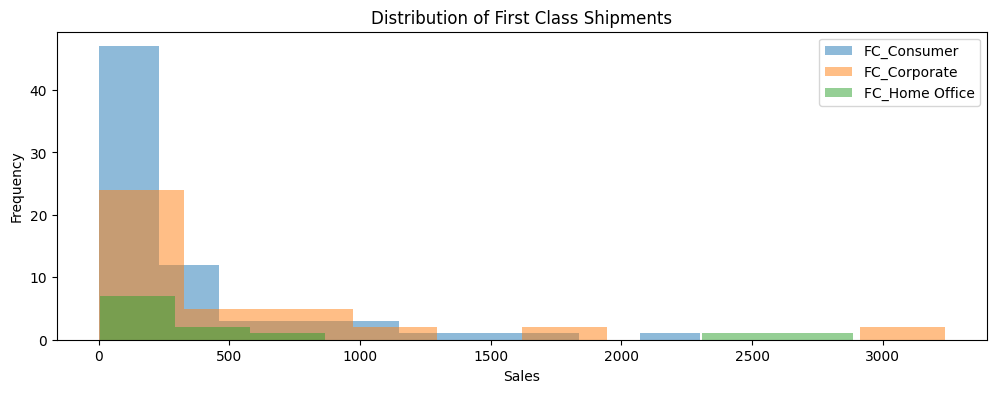

In [691]:
#Histogram of first class shipments
plt.figure(figsize=(12, 4))
for col in first_class.columns:
    plt.hist(first_class[col], bins=10, alpha=0.5, label=col)
plt.title('Distribution of First Class Shipments')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Histogram_Firstclass.png')
plt.show()

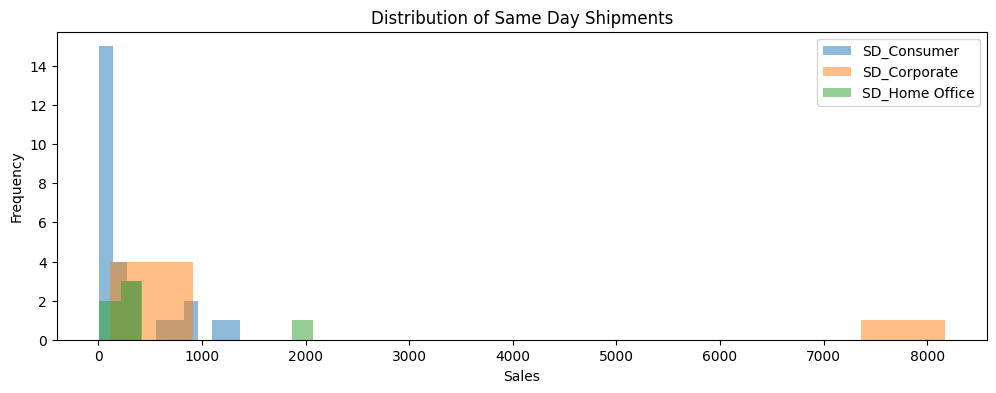

In [692]:
#Histogram of Same day shipments
plt.figure(figsize=(12, 4))
for col in same_day.columns:
    plt.hist(same_day[col], bins=10, alpha=0.5, label=col)
plt.title('Distribution of Same Day Shipments')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Histogram_Sameday.png')
plt.show()

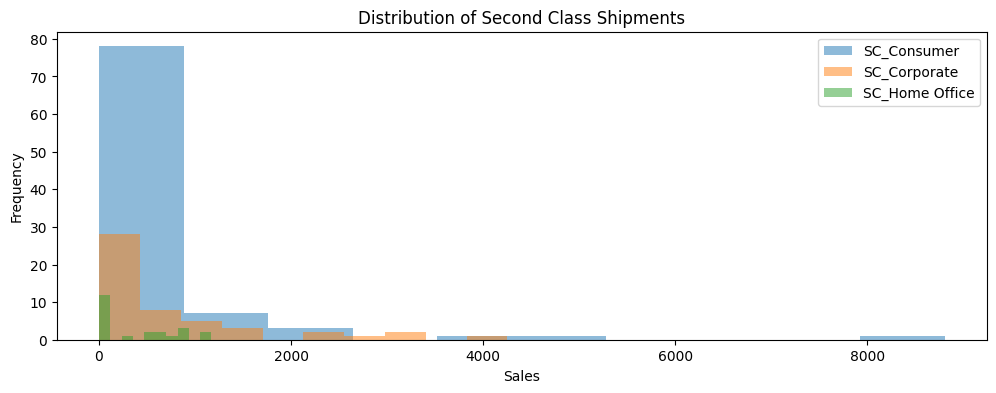

In [693]:
#Histogram of Second class shipments
plt.figure(figsize=(12, 4))
for col in second_class.columns:
    plt.hist(second_class[col], bins=10, alpha=0.5, label=col)
plt.title('Distribution of Second Class Shipments')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Histogram_Secondclass.png')
plt.show()

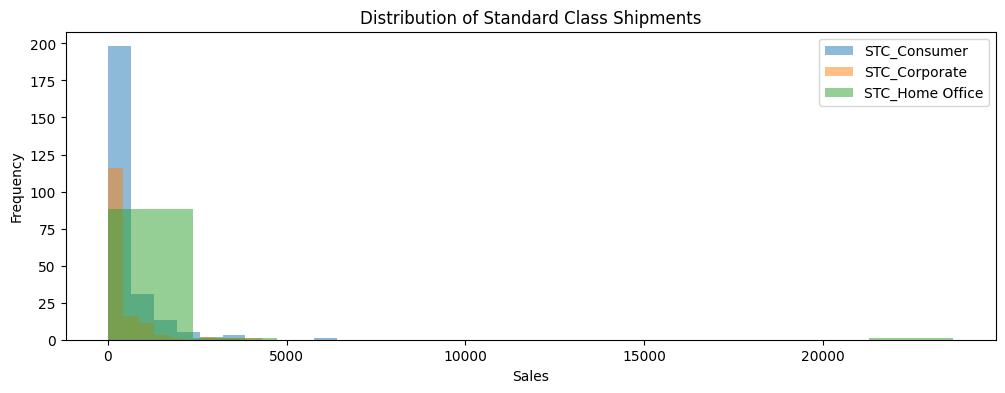

In [694]:
#Histogram of Standard class shipments
plt.figure(figsize=(12, 4))
for col in standard_class.columns:
    plt.hist(standard_class[col], bins=10, alpha=0.5, label=col)
plt.title('Distribution of Standard Class Shipments')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Histogram_Standardclass.png')
plt.show()

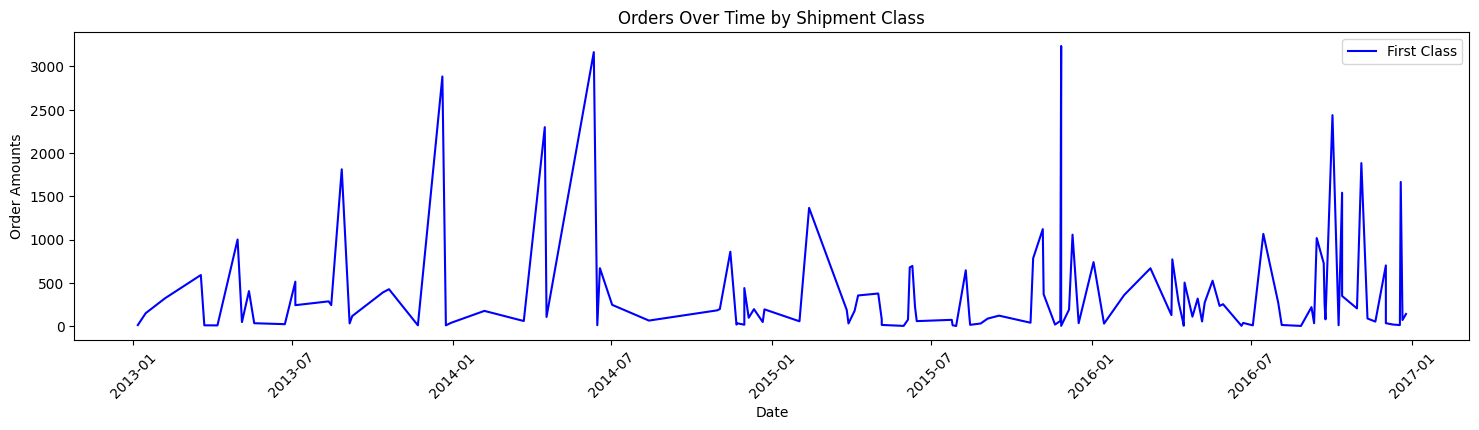

In [695]:
#create dataframes for each class and remove rows with 0 sales for line plot
#dataframe for first class
first_class_orders = sales.iloc[:, 0:3].sum(axis=1)
first_class_orders.name = 'First Class Orders'
first_class_df = first_class_orders.to_frame()

#remove rows without any order/shipment
first_class_df = first_class_df.loc[(first_class_df!=0).any(axis=1)]

#line chart for first class
plt.figure(figsize=(18, 4))
plt.plot(first_class_df.index, first_class_df, color = 'blue', label='First Class')

plt.xlabel('Date')
plt.ylabel('Order Amounts')
plt.title('Orders Over Time by Shipment Class')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Linechart_Firstclass.png')
plt.show()

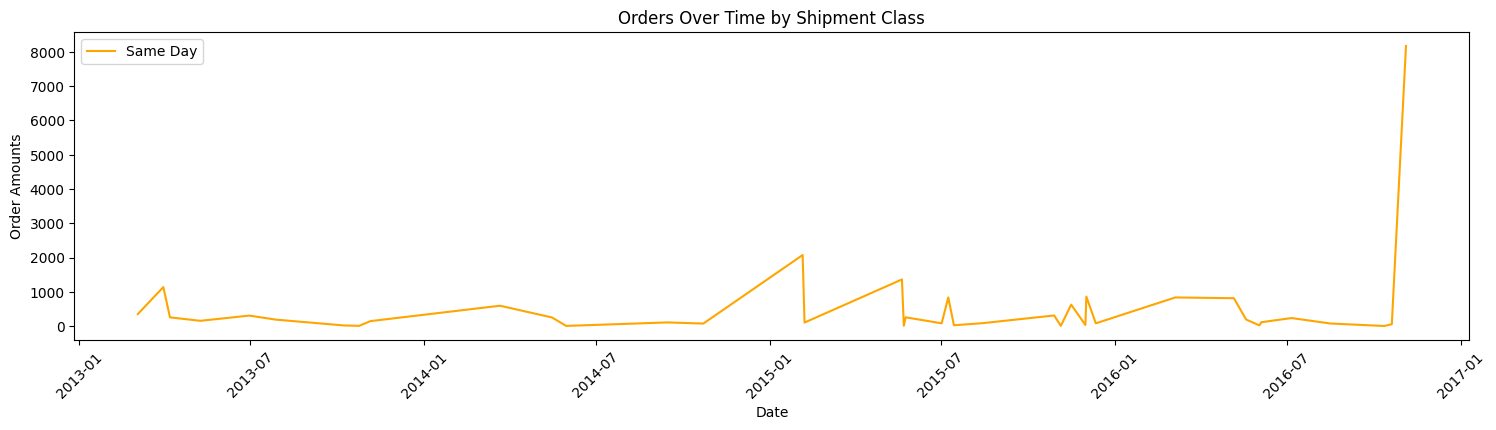

In [696]:
#dataframe for same day
same_day_orders    = sales.iloc[:, 3:6].sum(axis=1)
same_day_orders.name = 'Same Day Orders'
same_day_df = same_day_orders.to_frame()

#remove rows without any order/shipment
same_day_df = same_day_df.loc[(same_day_df!=0).any(axis=1)]

#line chart for same day
plt.figure(figsize=(18, 4))
plt.plot(same_day_df.index, same_day_df, color = 'orange', label='Same Day')

plt.xlabel('Date')
plt.ylabel('Order Amounts')
plt.title('Orders Over Time by Shipment Class')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Linechart_Sameday.png')
plt.show()

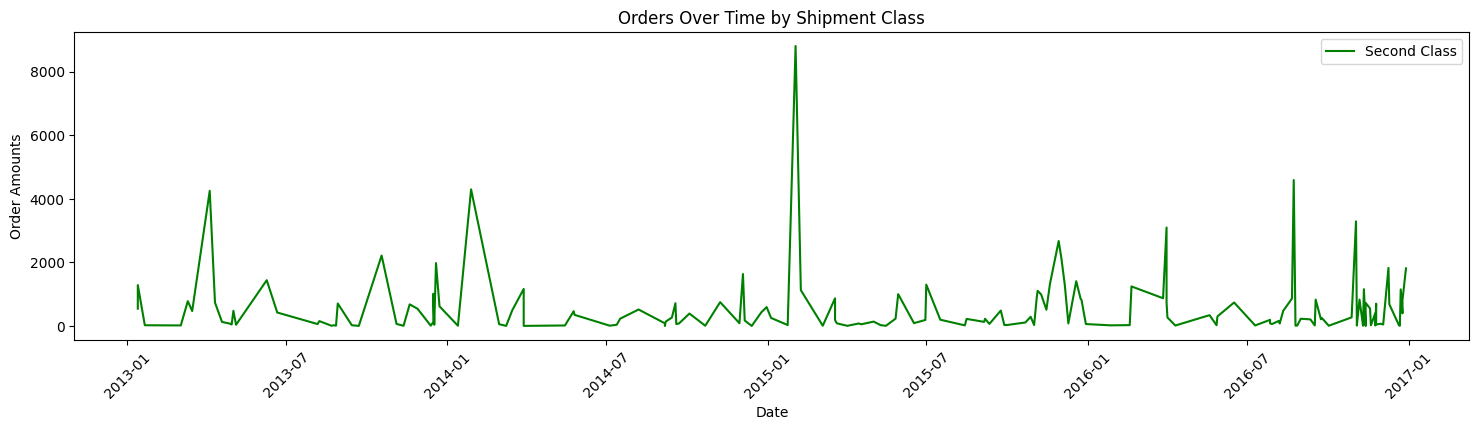

In [697]:
#dataframe for second class
second_class_orders = sales.iloc[:, 6:9].sum(axis=1)
second_class_orders.name = 'Second Class Orders'
second_class_df = second_class_orders.to_frame()

#remove rows without any order/shipment
second_class_df = second_class_df.loc[(second_class_df!=0).any(axis=1)]

plt.figure(figsize=(18, 4))
plt.plot(second_class_df.index, second_class_df, color = 'green', label='Second Class')


plt.xlabel('Date')
plt.ylabel('Order Amounts')
plt.title('Orders Over Time by Shipment Class')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Linechart_Secondclass.png')
plt.show()

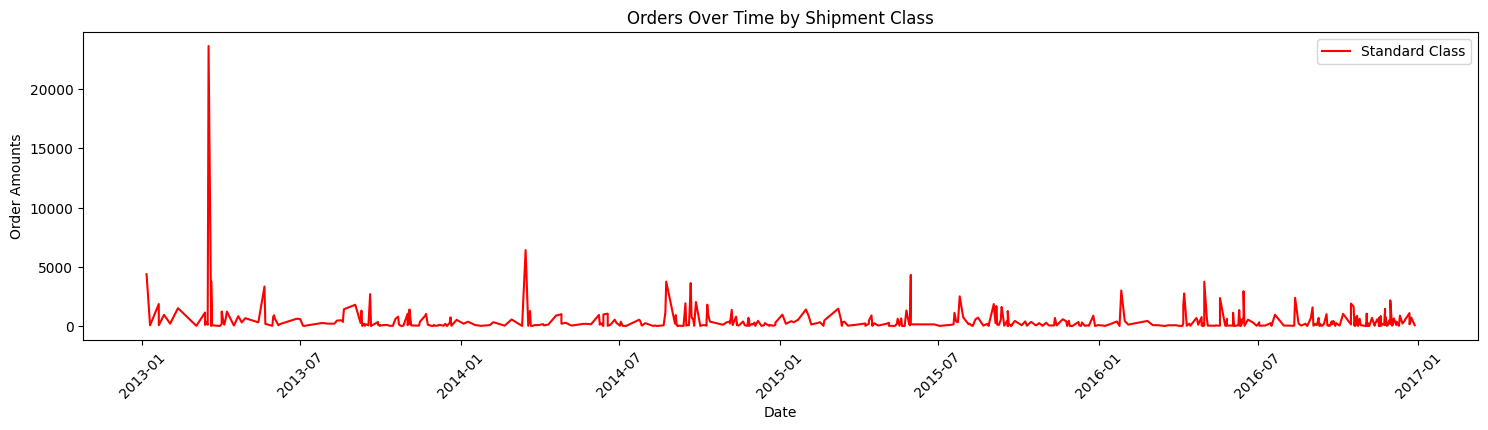

In [698]:
#dataframe for standard class
standard_class_orders = sales.iloc[:, 9:12].sum(axis=1)
standard_class_orders.name = 'Standard Class Orders'
standard_class_df = standard_class_orders.to_frame()

#remove rows without any order/shipment
standard_class_df = standard_class_df.loc[(standard_class_df!=0).any(axis=1)]

plt.figure(figsize=(18, 4))
plt.plot(standard_class_df.index, standard_class_df, color = 'red', label='Standard Class')

plt.xlabel('Date')
plt.ylabel('Order Amounts')
plt.title('Orders Over Time by Shipment Class')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Linechart_Standardclass.png')
plt.show()

In [699]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Preparing each shipping class for linear regression

In [700]:
first_class_df['Year'] = first_class_df.index
first_class_df['Year'] = first_class_df['Year'].map(pd.Timestamp.toordinal)

X_first = first_class_df[['Year']]
y_first = first_class_df['First Class Orders']

#Splitting the data into training and test sets in proportion of 80% and 20% respectively
X_first_train, X_first_test, y_first_train, y_first_test = train_test_split(X_first, y_first, test_size=0.2, shuffle=False)

In [701]:
#Initializing the linear regression model
model = LinearRegression()

#Training the model on the training data available
model.fit(X_first_train, y_first_train)

LinearRegression()

In [702]:
#Making predictions on the testing data
y_first_pred = model.predict(X_first_test)

In [703]:
#Evaluating the models using MSE metric
mse_first = mean_squared_error(y_first_test, y_first_pred)
print(f'Mean Squared Error: {mse_first}')

Mean Squared Error: 509677.1090680621


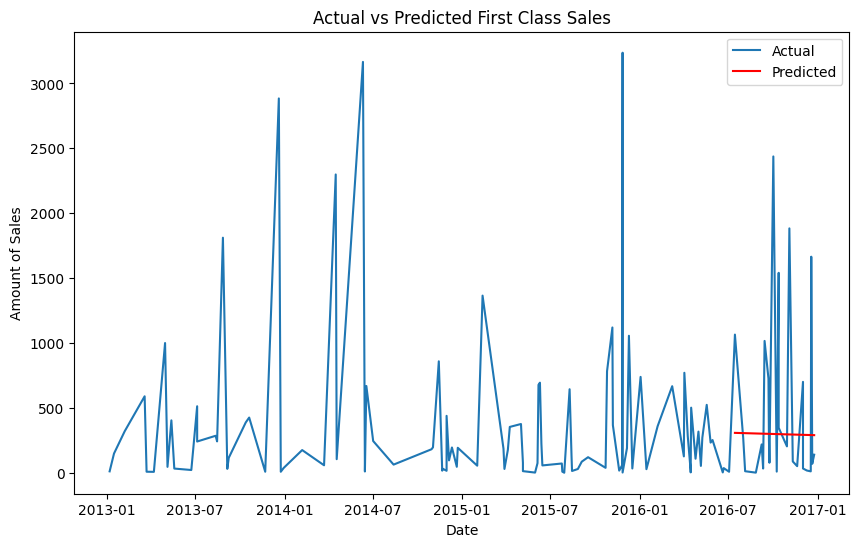

In [704]:
#Plotting the actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 6))
plt.plot(first_class_df.index, first_class_df['First Class Orders'], label='Actual')
plt.plot(X_first_test.index, y_first_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted First Class Sales')
plt.xlabel('Date')
plt.ylabel('Amount of Sales')
plt.legend()
#Saving the plot as an image
plt.savefig('actual_vs_predicted.png')
plt.show()


In [705]:
same_day_df['Year'] = same_day_df.index
same_day_df['Year'] = same_day_df['Year'].map(pd.Timestamp.toordinal)

X_same = same_day_df[['Year']]
y_same = same_day_df['Same Day Orders']

#Splitting the data into training and test sets in proportion of 80% and 20% respectively
X_same_train, X_same_test, y_same_train, y_same_test = train_test_split(X_same, y_same, test_size=0.2, shuffle=False)

In [706]:
#Initializing the linear regression model
model = LinearRegression()

#Training the model on the training data available
model.fit(X_same_train, y_same_train)

LinearRegression()

In [707]:
#Making predictions on the testing data
y_same_pred = model.predict(X_same_test)

In [708]:
#Evaluating the models using MSE metric
mse_same = mean_squared_error(y_same_test, y_same_pred)
print(f'Mean Squared Error: {mse_same}')

Mean Squared Error: 7457449.709849731


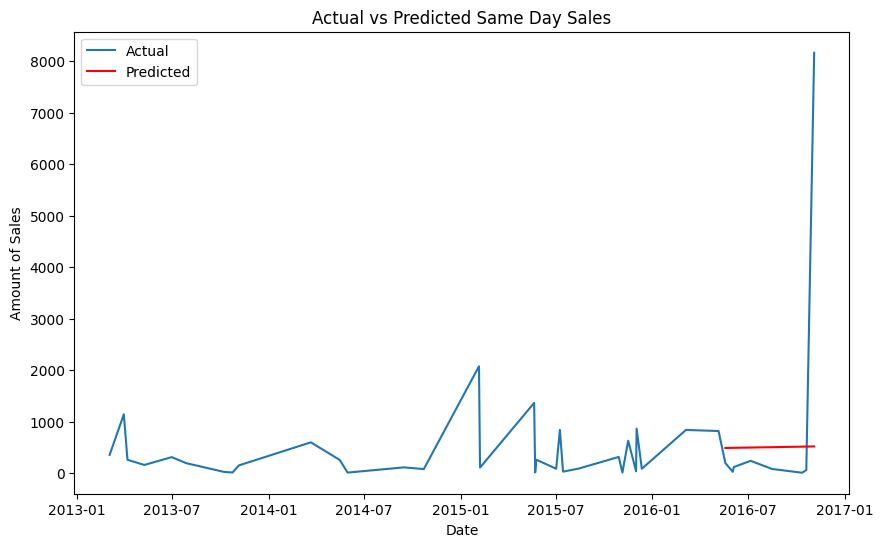

In [709]:
#Plotting the actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 6))
plt.plot(same_day_df.index, same_day_df['Same Day Orders'], label='Actual')
plt.plot(X_same_test.index, y_same_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Same Day Sales')
plt.xlabel('Date')
plt.ylabel('Amount of Sales')
plt.legend()
#Saving the plot as an image
plt.savefig('actual_vs_predicted2.png')
plt.show()


In [710]:
second_class_df['Year'] = second_class_df.index
second_class_df['Year'] = second_class_df['Year'].map(pd.Timestamp.toordinal)

X_second = second_class_df[['Year']]
y_second = second_class_df['Second Class Orders']

#Splitting the data into training and test sets in proportion of 80% and 20% respectively
X_second_train, X_second_test, y_second_train, y_second_test = train_test_split(X_second, y_second, test_size=0.2, shuffle=False)

In [711]:
#Initializing the linear regression model
model = LinearRegression()

# Training the model on the training data available
model.fit(X_second_train, y_second_train)

LinearRegression()

In [712]:
#Making predictions on the testing data
y_second_pred = model.predict(X_second_test)

In [713]:
#Evaluating the models using MSE metric
mse_second = mean_squared_error(y_second_test, y_second_pred)
print(f'Mean Squared Error: {mse_second}')

Mean Squared Error: 504921.7991294447


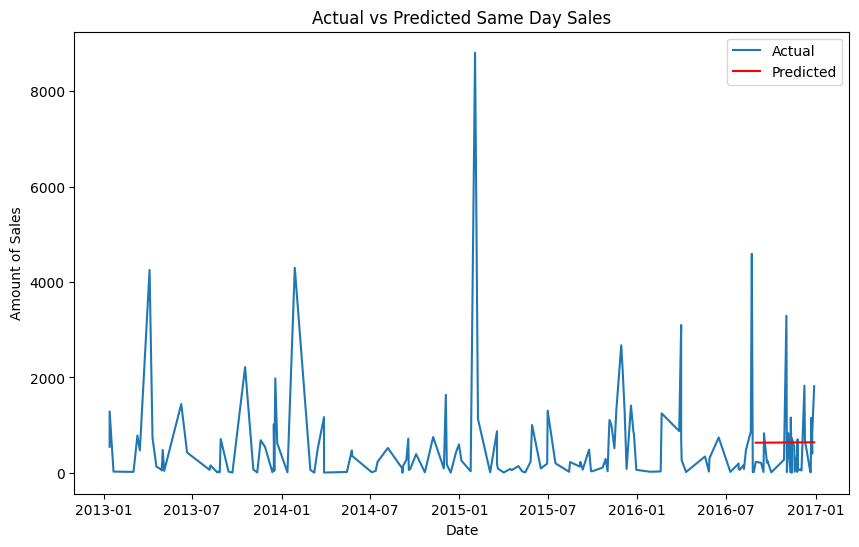

In [714]:
#Plotting the actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 6))
plt.plot(second_class_df.index, second_class_df['Second Class Orders'], label='Actual')
plt.plot(X_second_test.index, y_second_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Same Day Sales')
plt.xlabel('Date')
plt.ylabel('Amount of Sales')
plt.legend()
#Saving the plot as an image
plt.savefig('actual_vs_predicted3.png')
plt.show()


In [715]:
standard_class_df['Year'] = standard_class_df.index
standard_class_df['Year'] = standard_class_df['Year'].map(pd.Timestamp.toordinal)

X_standard = standard_class_df[['Year']]
y_standard = standard_class_df['Standard Class Orders']

#Splitting the data into training and test sets in proportion of 80% and 20% respectively
X_standard_train, X_standard_test, y_standard_train, y_standard_test = train_test_split(X_standard, y_standard, test_size=0.2, shuffle=False)

In [716]:
#Initializing the linear regression model
model = LinearRegression()

# Training the model on the training data available
model.fit(X_standard_train, y_standard_train)

LinearRegression()

In [717]:
#Making predictions on the testing data
y_standard_pred = model.predict(X_standard_test)

In [718]:
#Evaluating the models using MSE metric
mse_standard = mean_squared_error(y_standard_test, y_standard_pred)
print(f'Mean Squared Error: {mse_standard}')

Mean Squared Error: 267778.3066721677


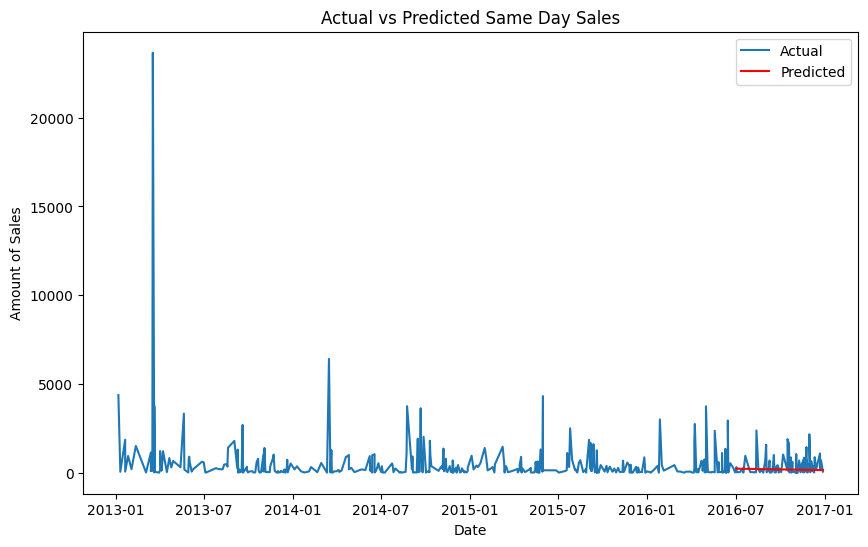

In [719]:
#Plotting the actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 6))
plt.plot(standard_class_df.index, standard_class_df['Standard Class Orders'], label='Actual')
plt.plot(X_standard_test.index, y_standard_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Same Day Sales')
plt.xlabel('Date')
plt.ylabel('Amount of Sales')
plt.legend()
#Saving the plot as an image
plt.savefig('actual_vs_predicted4.png')
plt.show()